In [1]:
import numpy as np
import numpy.random as rnd
import time
import pylab as plt

In [2]:
#Length of match
match_minutes = 90
#Average goals per match
goals_per_match = 2.79

#Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/match_minutes)
print('The probability of a goal per minute is %5.5f. \n' % prob_per_minute )

The probability of a goal per minute is 0.03100. 



In [3]:
#Count of the number of goals
goals=0

for minute in range(match_minutes):

  #Generate a random number between 0 and 1.
  r=rnd.rand(1,1)

  #Prints an X when there is a goal and a zero otherwise.
  if (r < prob_per_minute):
    #Goal - if the random number is less than the goal probability.
    print('X', end = ' ')
    goals=goals+1
    time.sleep(1)  #Longer pause
  else:
    print('o', end = ' ')
    time.sleep(0.1)  #Short pause
print('\n')
print('Final whistle. \n \nThere were ' + str(goals) + ' goals.')

o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o 

Final whistle. 
 
There were 3 goals.


In [4]:
# we now simulate 380 matches of a football season and look at how well it predicts the distribution of the number of goals. 
# we loop over 380 matchesstore the number of goals for each match in array and then we make a histogram of the number of goals.

def simulateMatch(n, p):
  # n - number of time units
  # p - probability per time unit of a goal

  # Count the number of goals
  goals = 0

  for minute in range(n):
      # Generate a random number between 0 and 1.
      r = rnd.rand(1, 1)
      # Prints an X when there is a goal and a zero otherwise.
      if (r < p):
        # Goal - if the random number is less than the goal probability.
        goals = goals + 1

  return goals

# Number of matches
num_matches = 380

# Loop over all the matches and print the number of goals.
goals = np.zeros(num_matches)
for i in range(num_matches):
  goals[i] = simulateMatch(match_minutes, prob_per_minute)
  print('In match ' + str(i+1) + ' there were ' + str(int(goals[i])) + ' goals.')

In match 1 there were 5 goals.
In match 2 there were 1 goals.
In match 3 there were 0 goals.
In match 4 there were 0 goals.
In match 5 there were 5 goals.
In match 6 there were 3 goals.
In match 7 there were 5 goals.
In match 8 there were 2 goals.
In match 9 there were 4 goals.
In match 10 there were 6 goals.
In match 11 there were 2 goals.
In match 12 there were 4 goals.
In match 13 there were 5 goals.
In match 14 there were 1 goals.
In match 15 there were 2 goals.
In match 16 there were 2 goals.
In match 17 there were 3 goals.
In match 18 there were 2 goals.
In match 19 there were 2 goals.
In match 20 there were 8 goals.
In match 21 there were 7 goals.
In match 22 there were 2 goals.
In match 23 there were 2 goals.
In match 24 there were 1 goals.
In match 25 there were 1 goals.
In match 26 there were 4 goals.
In match 27 there were 2 goals.
In match 28 there were 4 goals.
In match 29 there were 7 goals.
In match 30 there were 0 goals.
In match 31 there were 2 goals.
In match 32 there

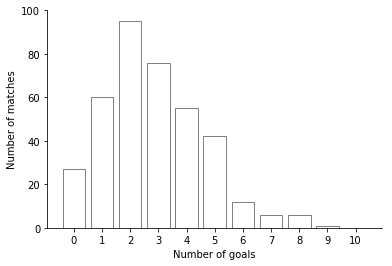

In [5]:
 # Create a histogram

fig, ax = plt.subplots(num=1)

histogram_range = np.arange(-0.5, 10.51, 1)
histogram_goals = np.histogram(goals, histogram_range)

ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='white', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
plt.show()

In [7]:
# importing the tools required for the Poisson regression model

import pandas as pd
import numpy as np
from scipy.stats import poisson,skellam

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn

In [9]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
ep = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl.head()

epl = epl[:-10]
epl.mean()

HomeGoals     1.332432
AwayGoals     1.351351
HTHG          0.654054
HTAG          0.610811
HS           12.775676
               ...    
PCAHA         1.969027
MaxCAHH       2.008162
MaxCAHA       2.025324
AvgCAHH       1.934703
AvgCAHA       1.949054
Length: 98, dtype: float64

In [17]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 306.5+ KB


In [18]:
print(epl.columns[:53])

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')


In [19]:
print(epl.columns[53:])

Index(['Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD',
       'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH',
       'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH',
       'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5',
       'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5',
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA'],
      dtype='object')


In [21]:
goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])
goal_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   team      740 non-null    object
 1   opponent  740 non-null    object
 2   goals     740 non-null    int64 
 3   home      740 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 28.9+ KB


In [20]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.8
Date:                Sat, 15 Oct 2022   Deviance:                       854.24
Time:                        23:56:15   Pearson chi2:                     769.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1070      0.216      0.495      0.620      -0.316       0.530
team[T.Aston Villa]              0.0019      0.195      0.010      0.992      -0.379       0.383
team[T.Brighton]                -0.2787      0.210     -1.330      0.183      -0.689       0.132
team[T.Burnley]                 -0.4499      0.222     -2.026      0.043      -0.885      -0.015
team[T.Chelsea]                  0.0689      0.191      0.361      0.718      -0.306       0.444
team[T.Crystal Palace]          -0.2297      0.208     -1.103      0.270      -0.638       0.179
team[T.Everton]                 -0.1208      0.201     -0.602      0.547      -0.514       0.273
team[T.Fulham]                  -0.6534      0.237     -2.760      0.006      -1.117      -0.189
team[T.Leeds]                    0.1384      0.190      0.730      0.465      -0.233       0.510
team[T.Leicester]                0.2286      0.185      1.237      0.216      -0.134       0.591
team[T.Liverpool]                0.2344      0.185      1.268      0.205      -0.128       0.597
team[T.Man City]                 0.3799      0.178      2.131      0.033       0.030       0.729
team[T.Man United]               0.3011      0.182      1.655      0.098      -0.055       0.658
team[T.Newcastle]               -0.1586      0.204     -0.776      0.438      -0.559       0.242
team[T.Sheffield United]        -0.9977      0.268     -3.727      0.000      -1.522      -0.473
team[T.Southampton]             -0.0891      0.201     -0.444      0.657      -0.483       0.304
team[T.Tottenham]                0.1963      0.186      1.055      0.291      -0.168       0.561
team[T.West Brom]               -0.4018      0.220     -1.826      0.068      -0.833       0.030
team[T.West Ham]                 0.1282      0.190      0.676      0.499      -0.243       0.500
team[T.Wolves]                  -0.4031      0.218     -1.848      0.065      -0.831       0.024
opponent[T.Aston Villa]          0.1522      0.219      0.695      0.487      -0.277       0.582
opponent[T.Brighton]             0.1135      0.220      0.516      0.606      -0.318       0.545
opponent[T.Burnley]              0.2942      0.210      1.398      0.162      -0.118       0.707
opponent[T.Chelsea]             -0.1263      0.235     -0.538      0.591      -0.587       0.334
opponent[T.Crystal Palace]       0.4978      0.203      2.446      0.014       0.099       0.897
opponent[T.Everton]              0.1110      0.221      0.501      0.616      -0.323       0.545
opponent[T.Fulham]               0.2441      0.213      1.146      0.252      -0.173       0.662
opponent[T.Leeds]                0.3127      0.211      1.479      0.139      -0.102       0.727
opponent[T.Leicester]            0.1932      0.218      0.886      0.376    

In [30]:
# Set teams here
home_team='Man City'
away_team='Arsenal'

#Predict for Arsenal vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Man City against Arsenal expect to score: 1    1.6128
dtype: float64
Arsenal against Man City expect to score: 1    0.941386
dtype: float64
Man City: 3
Arsenal: 2


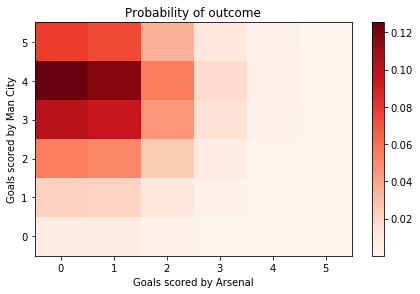

In [33]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,'opponent': awayTeam, 'home': 1},index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,'opponent': homeTeam, 'home': 0},index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))